# Trabalho 2 - Análise de Dados
### Utilizar os métodos CART, C5.0 e regressão linear (log) para classificar os tumores benignos e malignos, e os sobreviventes do titanic.

In [1]:
install.packages("caret") 
install.packages("xtable")
install.packages("C50") 
install.packages("rpart") 
install.packages("e1071") 

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
library(rpart)
library(C50)
library(e1071)
library(caret)
library(xtable)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [8]:
install.packages("OneR") 
library("OneR") 
breastcancer

Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
5,1,1,1,2,1,3,1,1,benign
5,4,4,5,7,10,3,2,1,benign
3,1,1,1,2,2,3,1,1,benign
6,8,8,1,3,4,3,7,1,benign
4,1,1,3,2,1,3,1,1,benign
8,10,10,8,7,10,9,7,1,malignant
1,1,1,1,2,10,3,1,1,benign
2,1,2,1,2,1,3,1,1,benign
2,1,1,1,2,1,1,1,5,benign
4,2,1,1,2,1,2,1,1,benign


In [19]:
set.seed(42) 
random <- sample(1:nrow(breastcancer), 0.7 * nrow(breastcancer))
breastcancer_train <- breastcancer[random, ]
breastcancer_test <- breastcancer[-random, ]

In [20]:
cancer_tree<-rpart(Class ~ ., data=breastcancer_train, method='class')
printcp(cancer_tree)


Classification tree:
rpart(formula = Class ~ ., data = breastcancer_train, method = "class")

Variables actually used in tree construction:
[1] Bare Nuclei              Uniformity of Cell Shape Uniformity of Cell Size 

Root node error: 177/489 = 0,36196

n= 489 

        CP nsplit rel error  xerror     xstd
1 0,830508      0  1,000000 1,00000 0,060039
2 0,073446      1  0,169492 0,19774 0,032206
3 0,016949      2  0,096045 0,10734 0,024143
4 0,010000      4  0,062147 0,10169 0,023524


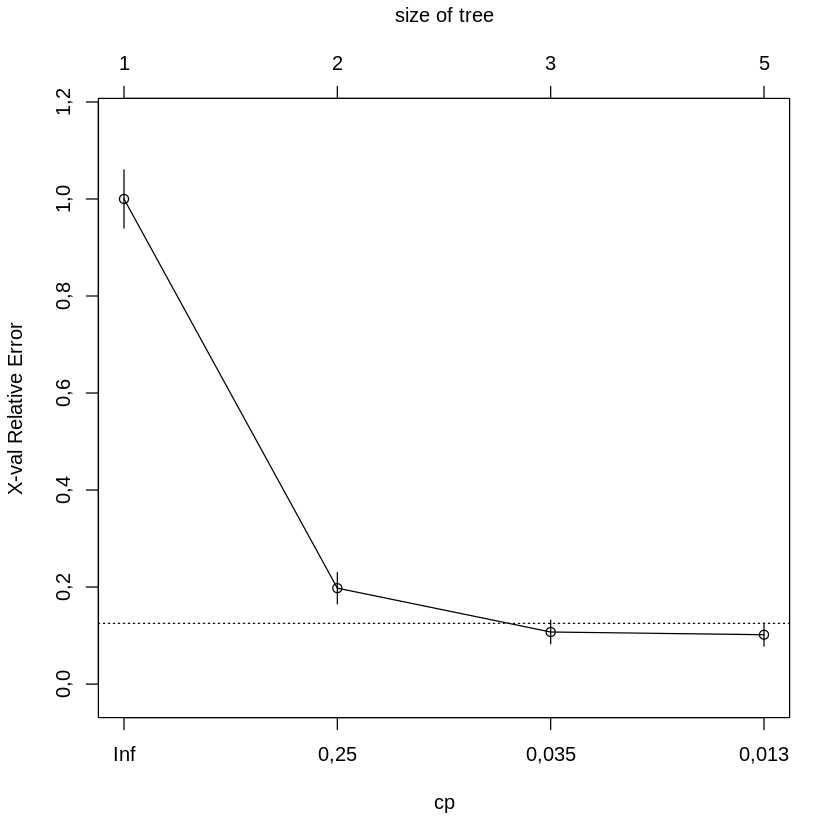

In [21]:
plotcp(cancer_tree)

In [22]:
summary(cancer_tree)

Call:
rpart(formula = Class ~ ., data = breastcancer_train, method = "class")
  n= 489 

          CP nsplit  rel error    xerror       xstd
1 0,83050847      0 1,00000000 1,0000000 0,06003938
2 0,07344633      1 0,16949153 0,1977401 0,03220581
3 0,01694915      2 0,09604520 0,1073446 0,02414338
4 0,01000000      4 0,06214689 0,1016949 0,02352442

Variable importance
    Uniformity of Cell Size    Uniformity of Cell Shape 
                         21                          18 
            Bland Chromatin Single Epithelial Cell Size 
                         15                          14 
            Normal Nucleoli           Marginal Adhesion 
                         14                          13 
                Bare Nuclei             Clump Thickness 
                          3                           2 

Node number 1: 489 observations,    complexity param=0,8305085
  predicted class=benign     expected loss=0,3619632  P(node) =1
    class counts:   312   177
   probabilitie

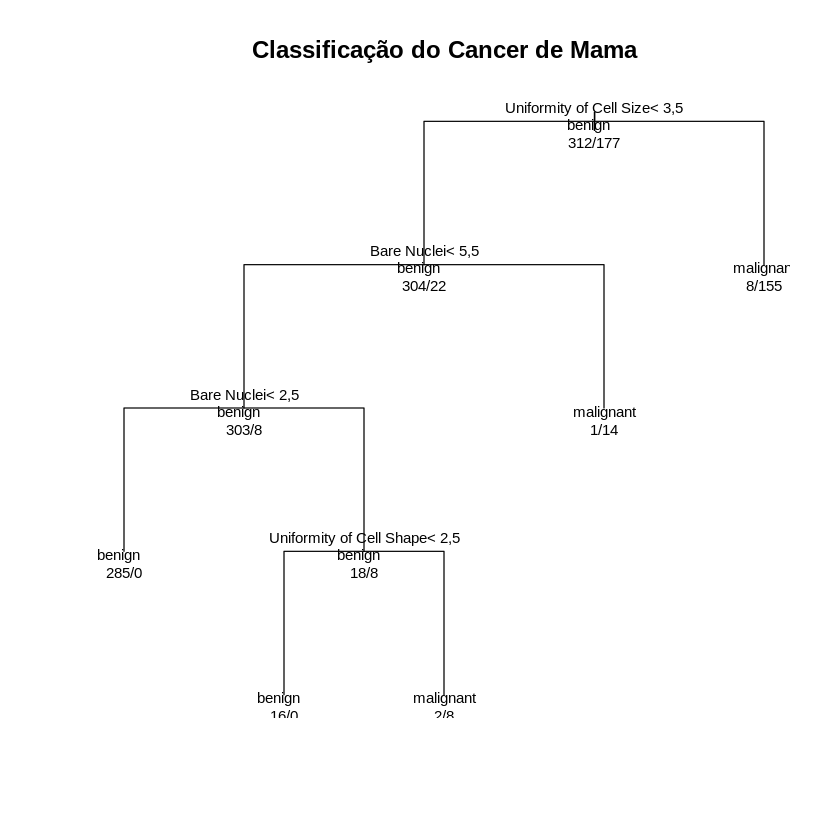

In [24]:
plot(cancer_tree, uniform=TRUE, main="Classificação do Cancer de Mama")
text(cancer_tree,use.n=TRUE, all= TRUE, cex=.75)

In [26]:
tree_part_train<-predict(cancer_tree, breastcancer_train, type ="class")
confusion_part_train<-confusionMatrix(breastcancer_train$Class, tree_part_train)
tree_part_test<-predict(cancer_tree, breastcancer_test, type ="class")
confusion_part_test<-confusionMatrix(breastcancer_test$Class, tree_part_test)

In [31]:
cancer_tree2 <-C5.0(Class ~ ., data=breastcancer_train)
summary(cancer_tree2)


Call:
C5.0.formula(formula = Class ~ ., data = breastcancer_train)


C5.0 [Release 2.07 GPL Edition]  	Fri Aug 23 23:07:14 2019
-------------------------------

Class specified by attribute `outcome'

Read 489 cases (10 attributes) from undefined.data

Decision tree:

Uniformity of Cell Size > 3:
:...Bland Chromatin > 2: malignant (157/5)
:   Bland Chromatin <= 2:
:   :...Clump Thickness <= 6: benign (3)
:       Clump Thickness > 6: malignant (3)
Uniformity of Cell Size <= 3:
:...Bare Nuclei <= 2: benign (284,1)
    Bare Nuclei > 2:
    :...Uniformity of Cell Shape > 2: malignant (22,3/3,3)
        Uniformity of Cell Shape <= 2:
        :...Clump Thickness <= 7: benign (16,6)
            Clump Thickness > 7: malignant (3)


Evaluation on training data (489 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     7    8( 1,6%)   <<


	   (a)   (b)    <-classified as
	  ----  ----
	   304     8    (a): class benign
	         177    (b): class malignant


	Attrib

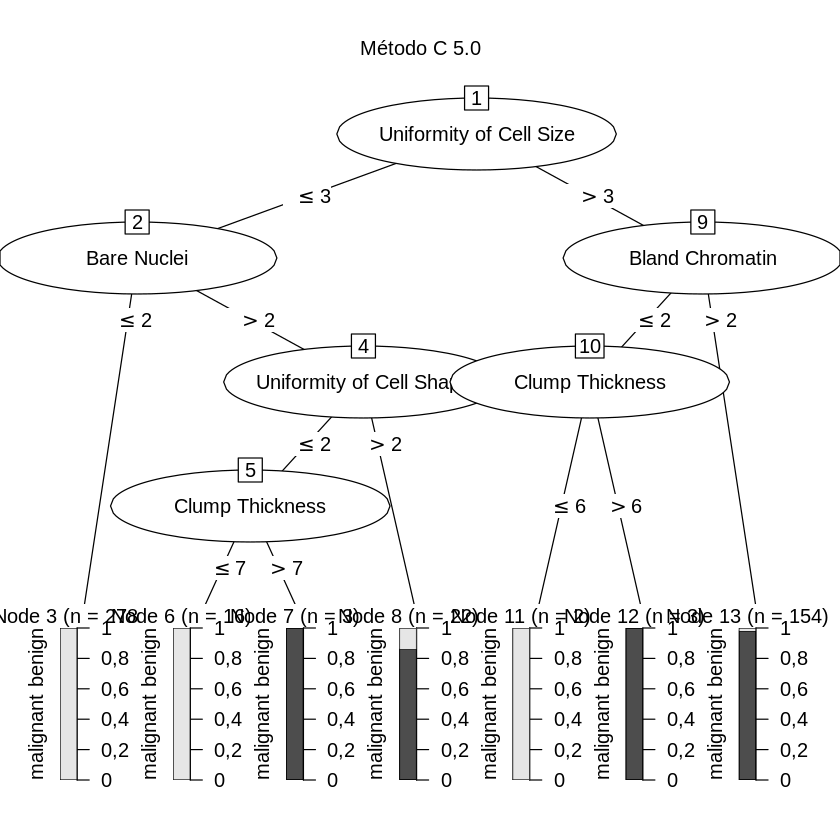

In [32]:
plot(cancer_tree2,main="Método C 5.0")

In [34]:
cancerprev_tree2<-predict(cancer_tree2, breastcancer_test)
confusion <- confusionMatrix(breastcancer_test$Class,cancerprev_tree2)
cancerprev_tree_train<-predict(cancer_tree2, breastcancer_train)
confusion_train <- confusionMatrix(breastcancer_train$Class,cancerprev_tree_train)
breastprev_tree2<-predict(cancer_tree2, breastcancer_train)
confusion2 <- confusionMatrix(breastcancer_train$Class,breastprev_tree2)

In [37]:
confusion

Confusion Matrix and Statistics

           Reference
Prediction  benign malignant
  benign       146         0
  malignant     55         9
                                          
               Accuracy : 0,7381          
                 95% CI : (0,6731, 0,7962)
    No Information Rate : 0,9571          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0,1854          
                                          
 Mcnemar's Test P-Value : 3,305e-13       
                                          
            Sensitivity : 0,7264          
            Specificity : 1,0000          
         Pos Pred Value : 1,0000          
         Neg Pred Value : 0,1406          
             Prevalence : 0,9571          
         Detection Rate : 0,6952          
   Detection Prevalence : 0,6952          
      Balanced Accuracy : 0,8632          
                                          
       'Positive' Class : benign          

In [38]:
confusion_train

Confusion Matrix and Statistics

           Reference
Prediction  benign malignant
  benign       309         3
  malignant    158        19
                                          
               Accuracy : 0,6708          
                 95% CI : (0,6271, 0,7123)
    No Information Rate : 0,955           
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0,1206          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0,6617          
            Specificity : 0,8636          
         Pos Pred Value : 0,9904          
         Neg Pred Value : 0,1073          
             Prevalence : 0,9550          
         Detection Rate : 0,6319          
   Detection Prevalence : 0,6380          
      Balanced Accuracy : 0,7627          
                                          
       'Positive' Class : benign          

In [42]:
confusion2

Confusion Matrix and Statistics

           Reference
Prediction  benign malignant
  benign       309         3
  malignant    158        19
                                          
               Accuracy : 0,6708          
                 95% CI : (0,6271, 0,7123)
    No Information Rate : 0,955           
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0,1206          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0,6617          
            Specificity : 0,8636          
         Pos Pred Value : 0,9904          
         Neg Pred Value : 0,1073          
             Prevalence : 0,9550          
         Detection Rate : 0,6319          
   Detection Prevalence : 0,6380          
      Balanced Accuracy : 0,7627          
                                          
       'Positive' Class : benign          

In [12]:
titanic <- read.csv("titanic.csv")
titanic

pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NA,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NA,"Montreal, PQ / Chesterville, ON"
1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,,135,"Montreal, PQ / Chesterville, ON"
1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NA,"New York, NY"
1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,NA,"Hudson, NY"
1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S,,NA,"Belfast, NI"
1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,D,NA,"Bayside, Queens, NY"
1,0,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,,C,,22,"Montevideo, Uruguay"


In [66]:
set.seed(42) 
random <- sample(1:nrow(titanic), 0.7 * nrow(titanic))
titanic_train <- titanic[random, ]
titanic <- titanic[-random, ]

In [67]:
titanic_tree<-rpart(survived ~ ., data=titanic, method='class')
printcp(titanic_tree)


Classification tree:
rpart(formula = survived ~ ., data = titanic, method = "class")

Variables actually used in tree construction:
[1] name

Root node error: 156/393 = 0,39695

n= 393 

    CP nsplit rel error   xerror     xstd
1 1,00      0         1 1,000000 0,062175
2 0,01      1         0 0,070513 0,020961


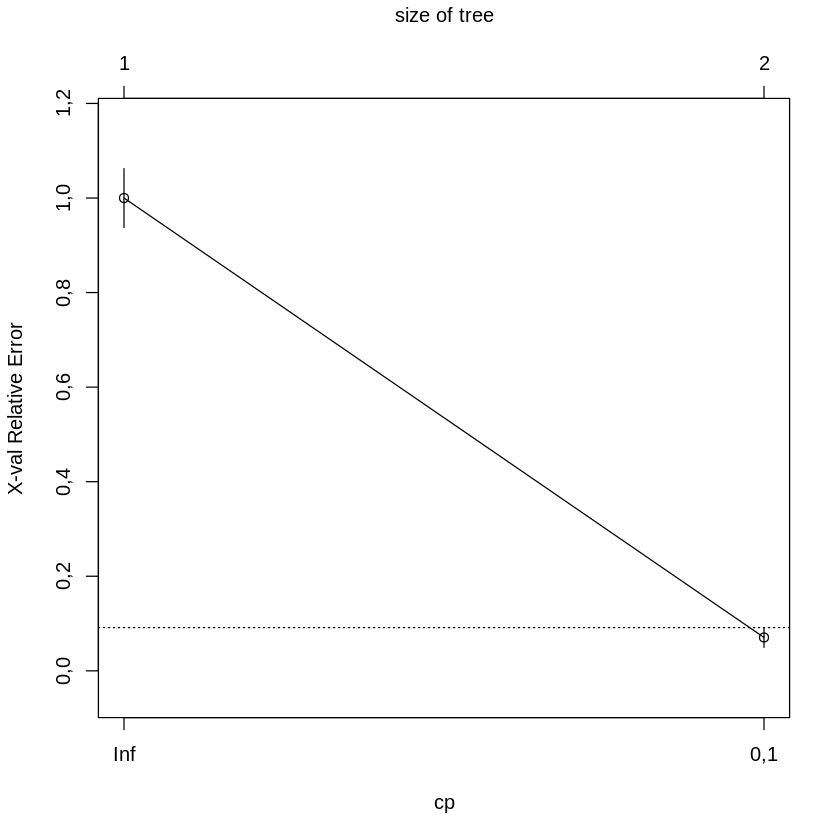

In [68]:
plotcp(titanic_tree)

In [70]:
summary(titanic_tree)

Call:
rpart(formula = survived ~ ., data = titanic, method = "class")
  n= 393 

    CP nsplit rel error     xerror       xstd
1 1,00      0         1 1,00000000 0,06217497
2 0,01      1         0 0,07051282 0,02096077

Variable importance
     name      boat    ticket home.dest       sex     cabin 
       24        22        21        14        10         8 

Node number 1: 393 observations,    complexity param=1
  predicted class=0  expected loss=0,3969466  P(node) =1
    class counts:   237   156
   probabilities: 0,603 0,397 
  left son=2 (237 obs) right son=3 (156 obs)
  Primary splits:
      name      splits as  -L-R-----R--LR--L--L-----LL---R-----L---LL--LR--L-R-----L--RL----R---RLL----LRR---RL-L-R-----R--------RL----R-------L-L--R----RR--L--R-LL-L-----R----R-----L----RL-------R-R--L-LR---LLRR-----L-L-----RR--L----R----------L-R-RL-LL---------LL-----L--L-L------R---L----R----L---RRRLL-R------R-L-LL----L--R----R------RL-------R-----------RL-R-----R-RR-------L--RLR--R-R--L--L-L---

Warning message in labels.rpart(x, minlength = minlength):
“more than 52 levels in a predicting factor, truncated for printout”

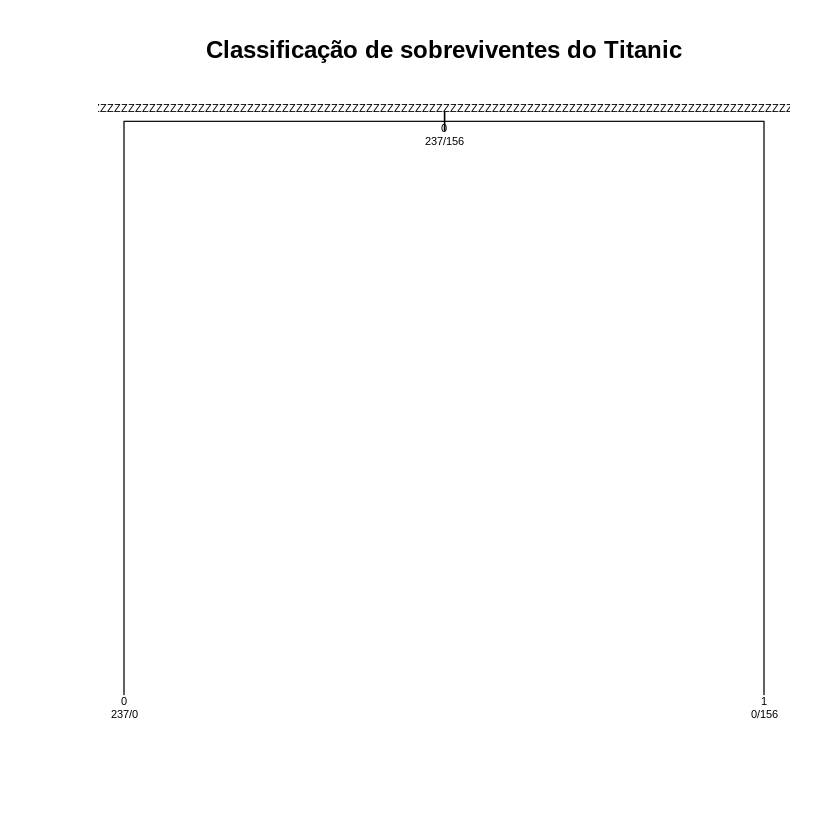

In [71]:
plot(titanic_tree, uniform=TRUE, main="Classificação de sobreviventes do Titanic")
text(titanic_tree,use.n=TRUE, all= TRUE, cex=.55)

In [72]:
table(predict(titanic_tree, titanic, type ="class"), titanic[ , "survived"])

   
      0   1
  0 237   0
  1   0 156

In [82]:
titanic_tree2 <-C5.0(survived ~ ., data=titanic)
summary(titanic_tree2)

ERROR: Error: C5.0 models require a factor outcome


In [74]:
plot(titanic_tree2,main="Método C 5.0")

ERROR: Error in plot(titanic_tree2, main = "Método C 5.0"): objeto 'titanic_tree2' não encontrado


In [75]:
titanicprev_tree2<-predict(titanic_tree2, titanic)

ERROR: Error in predict(titanic_tree2, titanic): objeto 'titanic_tree2' não encontrado


In [81]:
confusion <- confusionMatrix(titanic$survived,titanicprev_tree2)

ERROR: Error in is.factor(reference): objeto 'titanicprev_tree2' não encontrado


In [84]:
titanic_log<-glm(survived ~ ., data=titanic, family='binomial')

ERROR: Error in `contrasts<-`(`*tmp*`, value = contr.funs[1 + isOF[nn]]): contrasts can be applied only to factors with 2 or more levels


In [85]:
summary(titanic_log)
titanic_pred<-predict(titanic_log, titanic, type="response")

ERROR: Error in summary(titanic_log): objeto 'titanic_log' não encontrado


In [86]:
table(titanic$survived, titanic_pred > 0.5 )

ERROR: Error in table(titanic$survived, titanic_pred > 0,5): objeto 'titanic_pred' não encontrado
